# Домашнее задание №3 - Реализация базового варианта линейной регрессии

## Часть 1. Ваша реализация (60 баллов)

В этой части домашки вам предстоит **реализовать класс LinearRegressionSGD**, который обучает линейную регрессию методом стохастического градиентного спуска (SGD). Класс должен поддерживать **L1, L2 и Elastic Net регуляризацию**. Помимо этого, необходимо реализовать методы для **визуализации процесса обучения**: график функции потерь по эпохам и распределение ошибок на той или иной эпохе.

Ниже представлен шаблон кода с пропусками, которые необходимо заполнить.


* вычисление лосса (15 баллов)
* изменения в функции fit (25 баллов)
* predict (5 баллов)
* графики (15 баллов)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import product
from sklearn.model_selection import train_test_split

In [ ]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, epochs=1000, reg_type=None, reg_lambda=0.01, alpha=0.5):
        self.lr = lr
        self.epochs = epochs
        self.reg_type = reg_type
        self.reg_lambda = reg_lambda
        self.alpha = alpha
        self.theta = None
        self.loss_history = []
        self.error_records = []
    
    def _compute_loss(self, X, y):
        m = len(y)
        predictions = X @ self.theta
        loss = np.mean((predictions - y) ** 2) / 2
        
        if self.reg_type == 'l2':
            loss += (self.reg_lambda / 2) * np.sum(self.theta ** 2)
        elif self.reg_type == 'l1':
            loss += self.reg_lambda * np.sum(np.abs(self.theta))
        elif self.reg_type == 'elastic_net':
            loss += self.reg_lambda * (self.alpha * np.sum(np.abs(self.theta)) + (1 - self.alpha) * np.sum(self.theta ** 2) / 2)
        
        return loss
    
    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        
        for epoch in range(self.epochs):
            epoch_errors = []
        
            for i, idx in enumerate(np.random.randint(0, m, size=m)):
                xi, yi = X[idx], y[idx]
                pred = np.dot(xi, self.theta)
                error = pred - yi
                epoch_errors.append(error)
                
                gradient = xi * error
                
                if self.reg_type == 'l2':
                    gradient += self.reg_lambda * self.theta
                elif self.reg_type == 'l1':
                    gradient += self.reg_lambda * np.sign(self.theta)
                elif self.reg_type == 'elastic_net':
                    gradient += self.reg_lambda * (self.alpha * np.sign(self.theta) + (1 - self.alpha) * self.theta)
                
                self.theta -= self.lr * gradient
                
            self.loss_history.append(self._compute_loss(X, y))
            self.error_records.append(epoch_errors)
    
    def predict(self, X):
        return X @ self.theta
    
    def plot_loss(self):
        plt.plot(range(1, len(self.loss_history) + 1), self.loss_history, label='Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss Over Epochs')
        plt.legend()
        plt.show()
    
    def plot_error_distribution(self, epoch):
        if epoch >= len(self.error_records):
            raise ValueError("Epoch index out of range")
        
        plt.hist(self.error_records[epoch], bins=30, alpha=0.7, color='green', edgecolor='black')
        plt.xlabel('Error')
        plt.ylabel('Frequency')
        plt.title(f'Error Distribution at Epoch {epoch}')
        plt.show()


## Часть 2. Проверяем вашу реализацию (25 баллов)

Теперь для полученного класса вам нужно будет посмотреть, **как ведет себя регрессия для разных вариантов регуляризации**. Советуем рассмотреть несколько наборов значений для каждого вида регуляризации, а также посмотреть на несколько значений learning rate. 
 
Ваша цель - **понять какие значения лучше или хуже подходят** в случае ваших данных.

В качестве данных вам предлагается использовать сгенерированные выборки. Ниже представлен код для генерации.

In [5]:
sample_size = 500

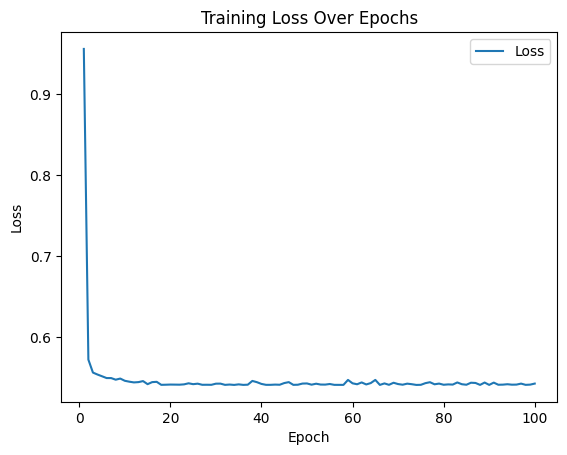

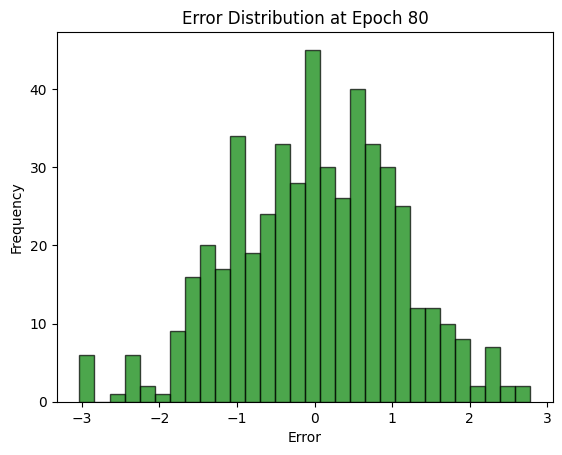

In [43]:
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.002, epochs=100, reg_lambda=0.1, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

Parameters: reg_type=None, lr=0.001, reg_lambda=0.01, alpha=0.5
Final loss: 0.5231



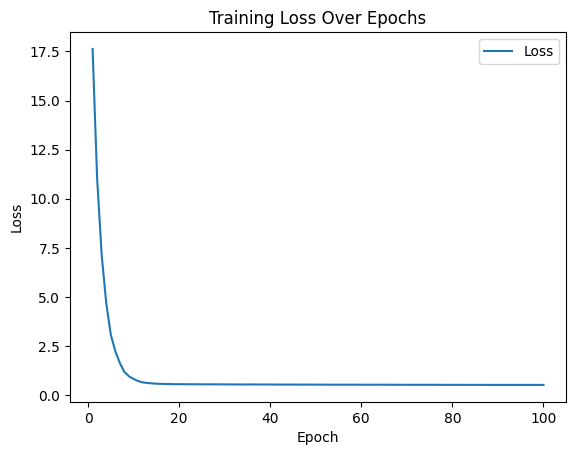

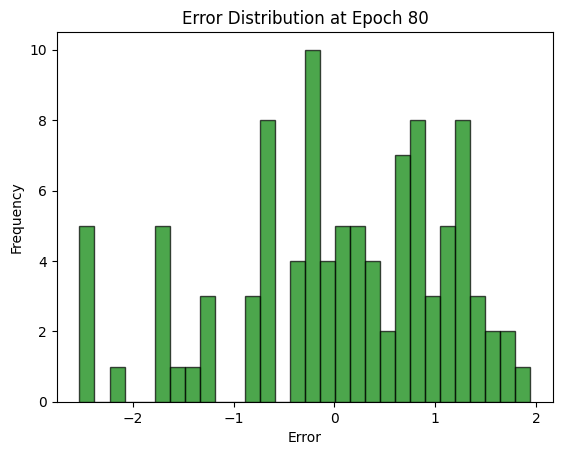

Parameters: reg_type=None, lr=0.001, reg_lambda=0.1, alpha=0.5
Final loss: 0.5251



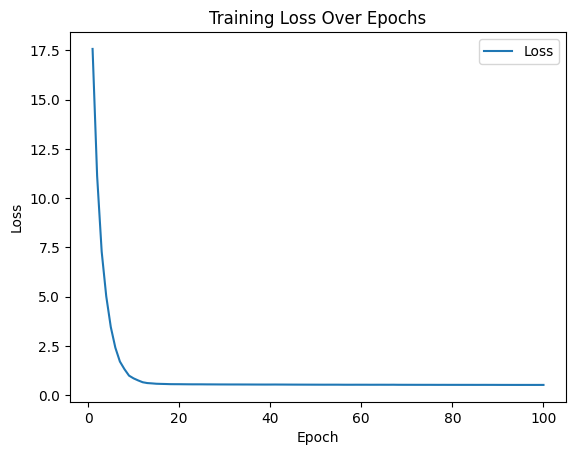

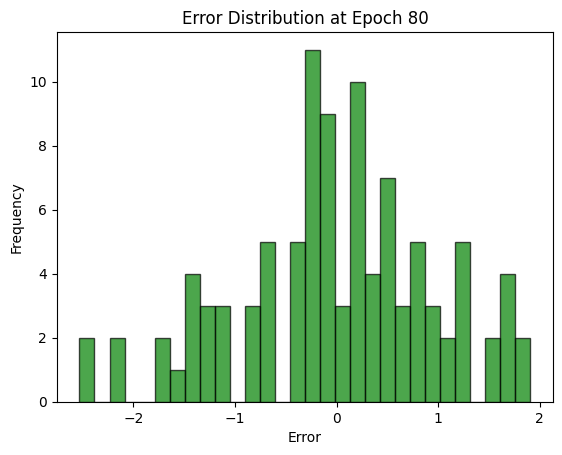

Parameters: reg_type=None, lr=0.005, reg_lambda=0.01, alpha=0.5
Final loss: 0.5198



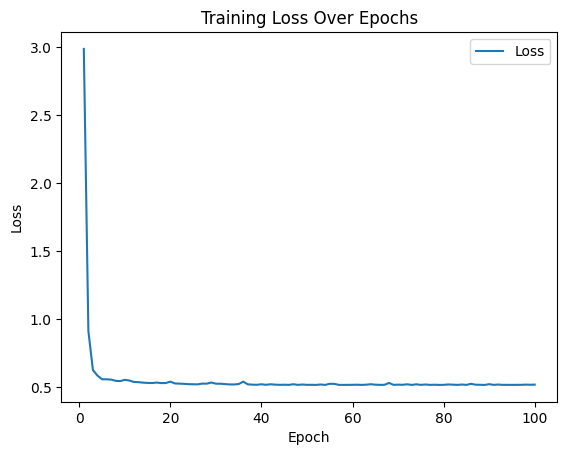

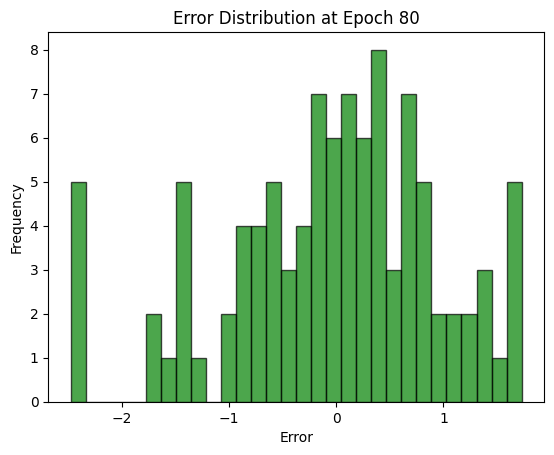

Parameters: reg_type=None, lr=0.005, reg_lambda=0.1, alpha=0.5
Final loss: 0.5181



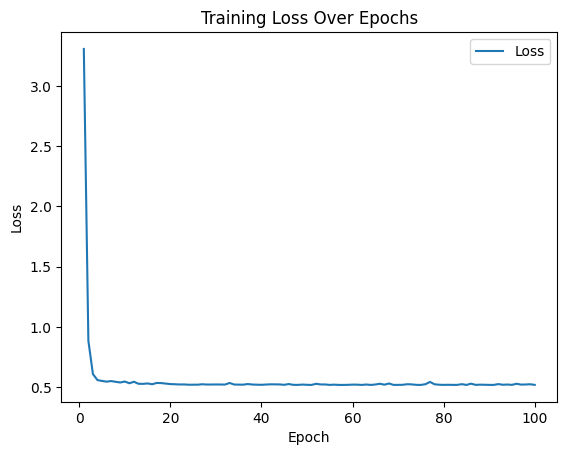

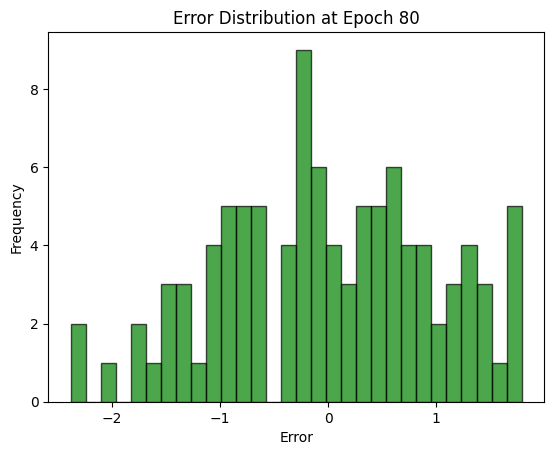

Parameters: reg_type=l1, lr=0.001, reg_lambda=0.01, alpha=0.5
Final loss: 0.5911



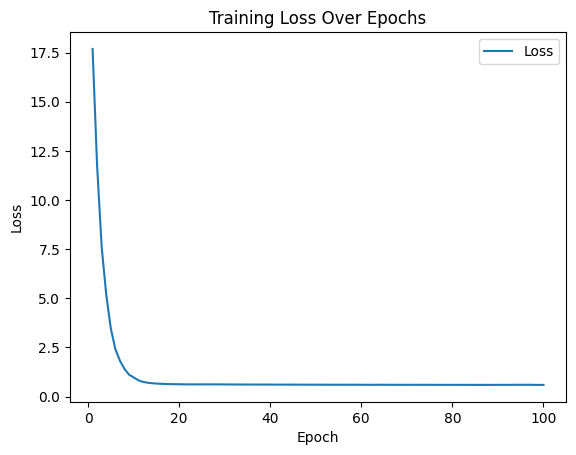

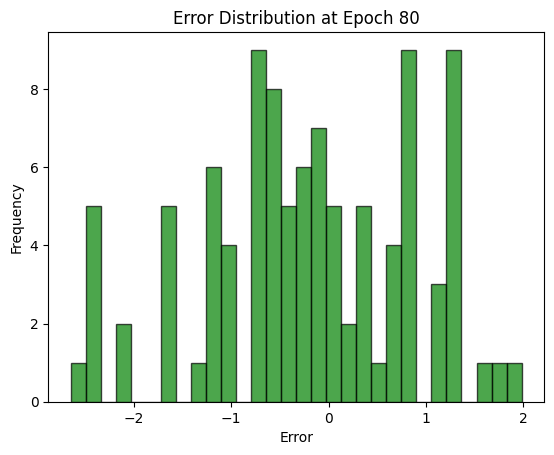

Parameters: reg_type=l1, lr=0.001, reg_lambda=0.1, alpha=0.5
Final loss: 1.2075



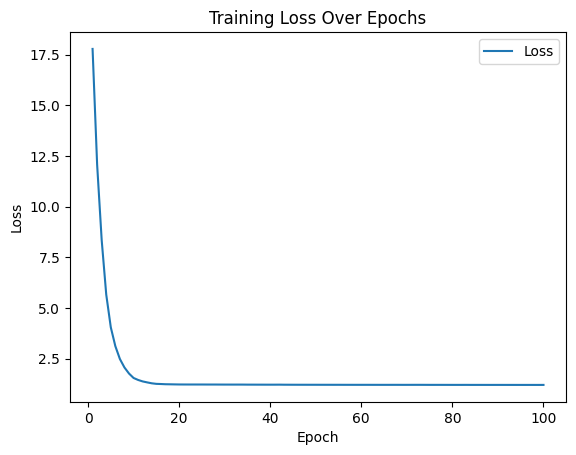

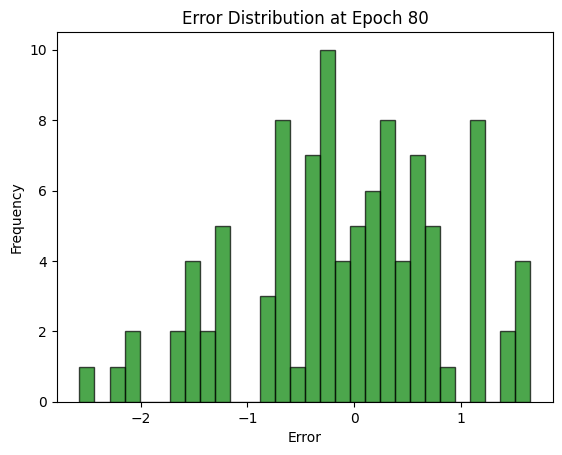

Parameters: reg_type=l1, lr=0.005, reg_lambda=0.01, alpha=0.5
Final loss: 0.5872



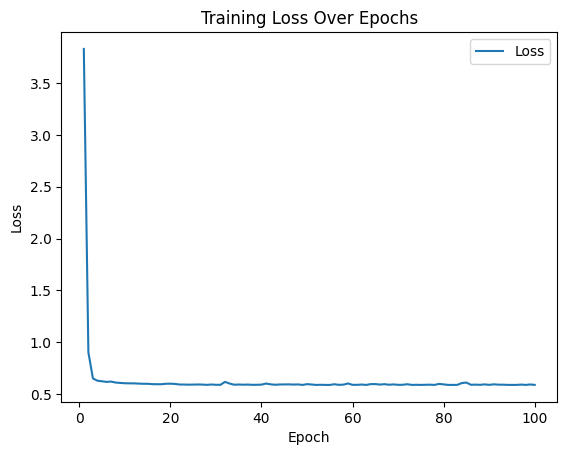

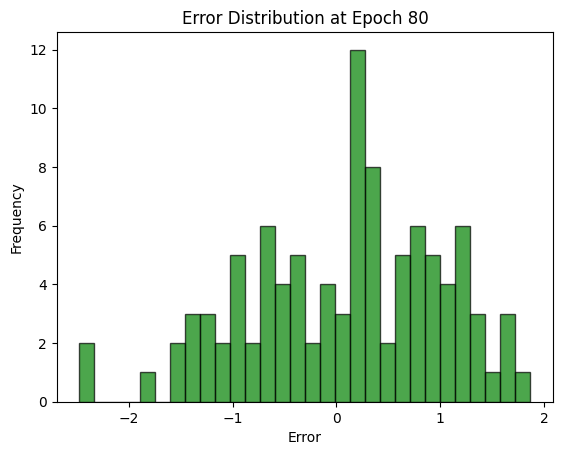

Parameters: reg_type=l1, lr=0.005, reg_lambda=0.1, alpha=0.5
Final loss: 1.2124



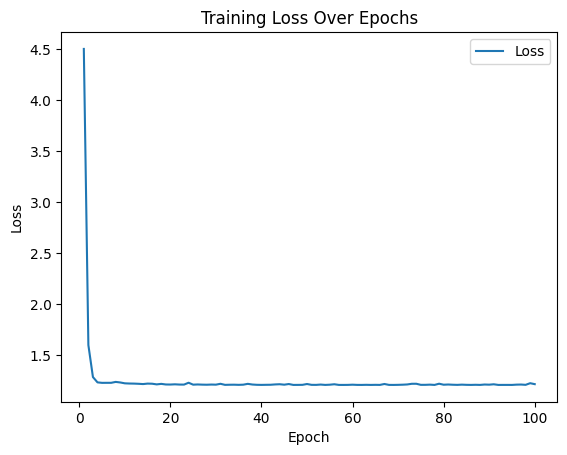

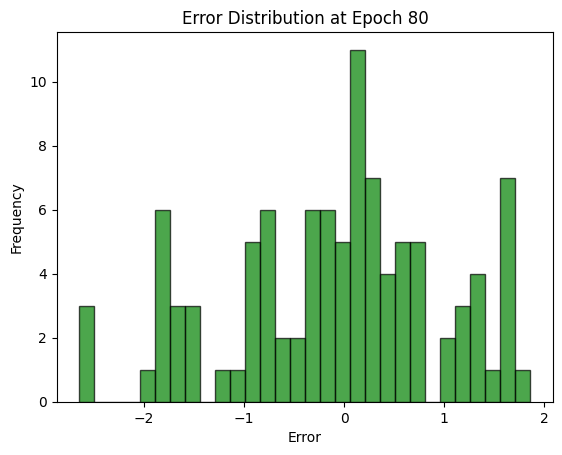

Parameters: reg_type=l2, lr=0.001, reg_lambda=0.01, alpha=0.5
Final loss: 0.6419



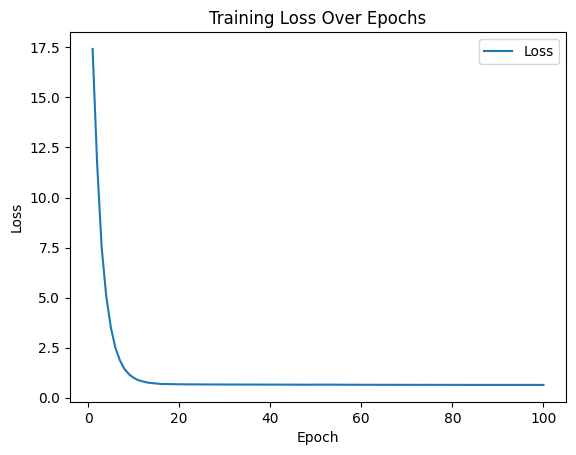

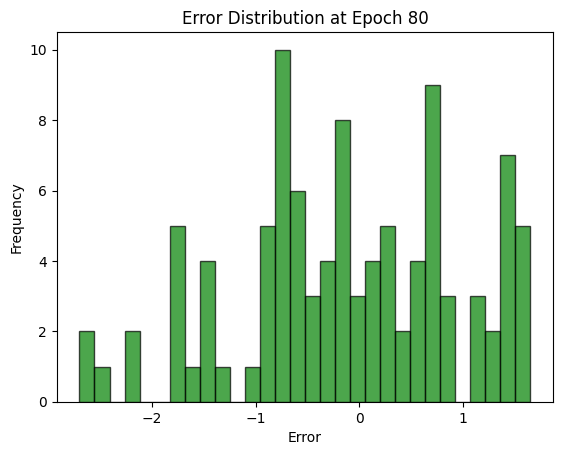

Parameters: reg_type=l2, lr=0.001, reg_lambda=0.1, alpha=0.5
Final loss: 1.6622



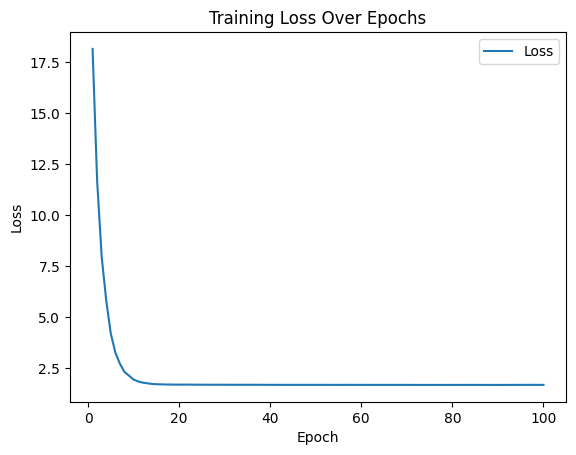

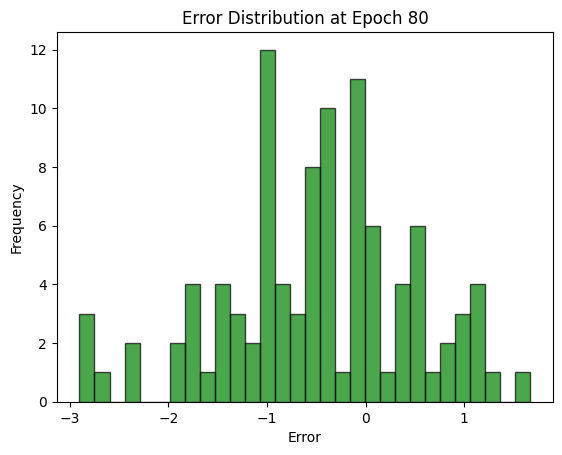

Parameters: reg_type=l2, lr=0.005, reg_lambda=0.01, alpha=0.5
Final loss: 0.6419



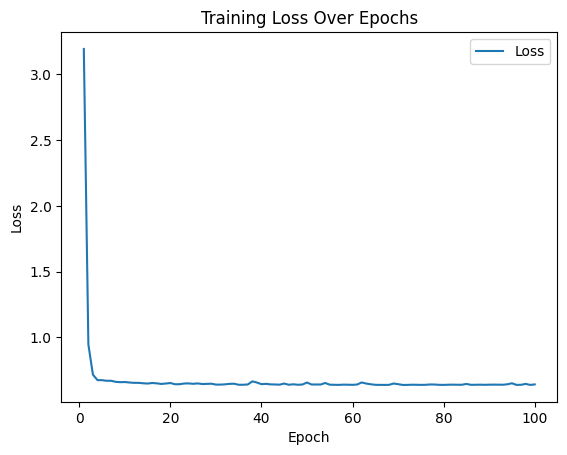

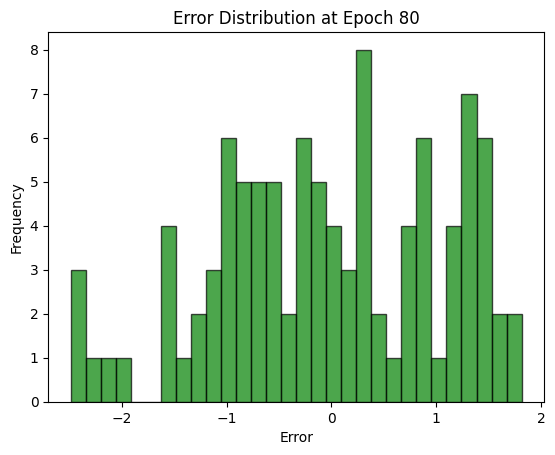

Parameters: reg_type=l2, lr=0.005, reg_lambda=0.1, alpha=0.5
Final loss: 1.6599



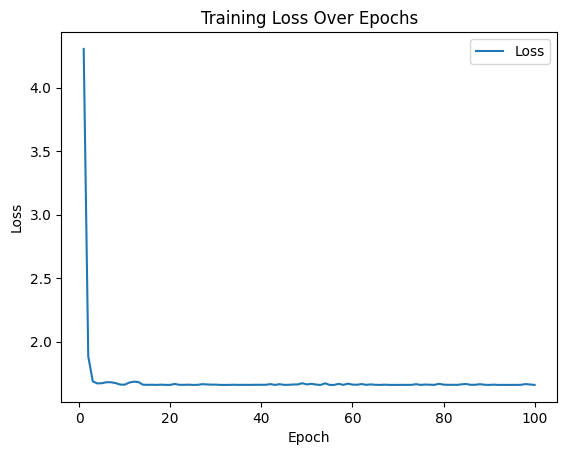

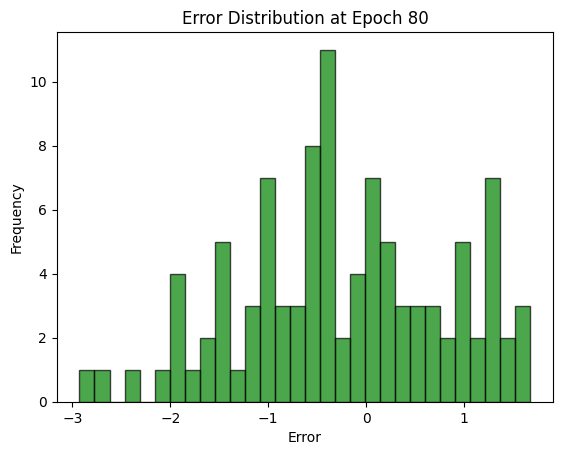

Parameters: reg_type=elastic_net, lr=0.001, reg_lambda=0.01, alpha=0.2
Final loss: 0.6356



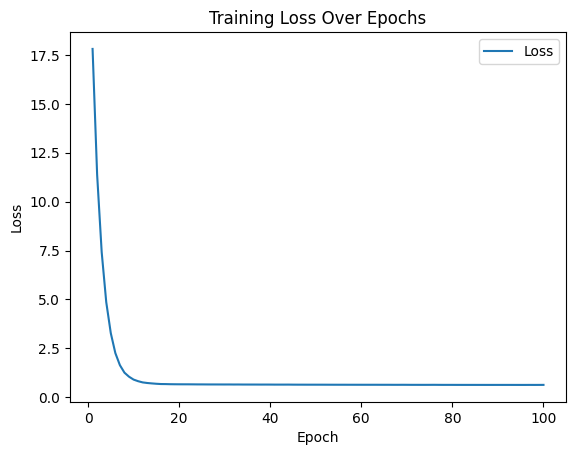

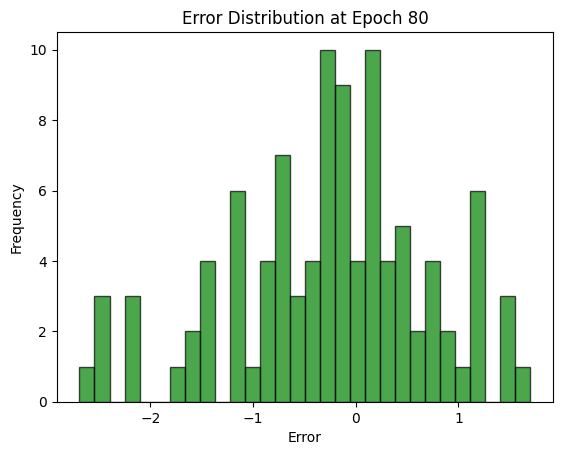

Parameters: reg_type=elastic_net, lr=0.001, reg_lambda=0.01, alpha=0.5
Final loss: 0.6184



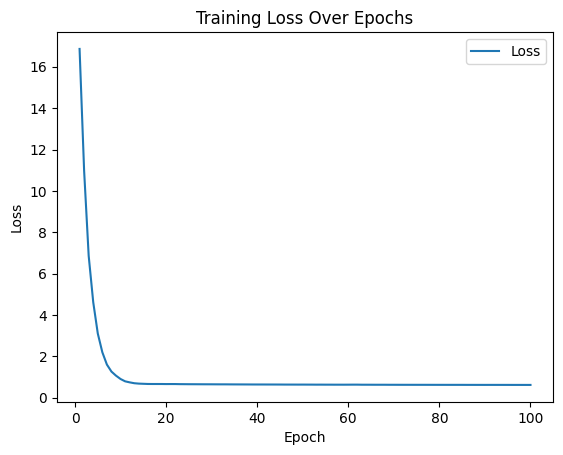

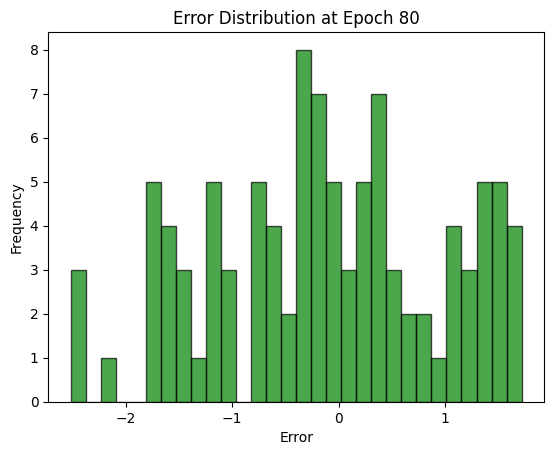

Parameters: reg_type=elastic_net, lr=0.001, reg_lambda=0.1, alpha=0.2
Final loss: 1.5741



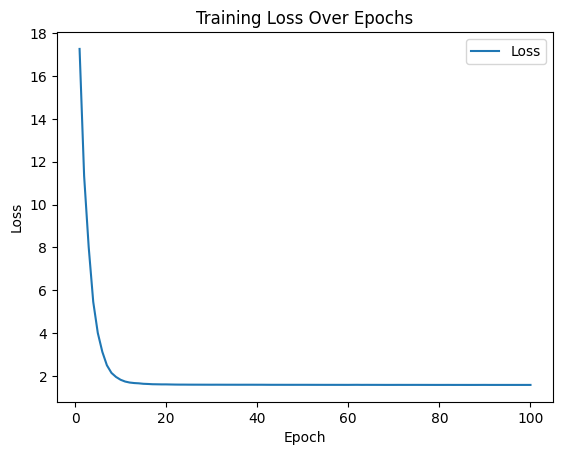

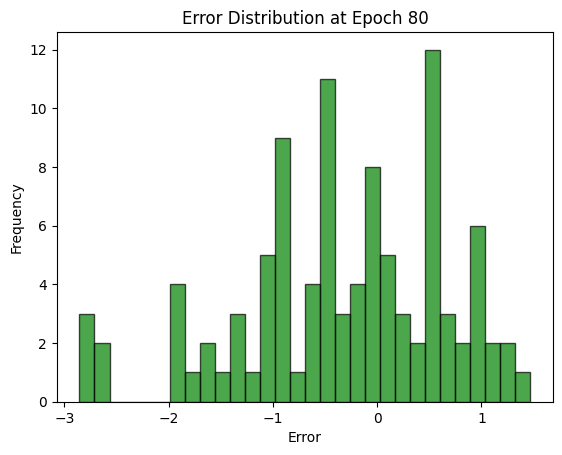

Parameters: reg_type=elastic_net, lr=0.001, reg_lambda=0.1, alpha=0.5
Final loss: 1.4413



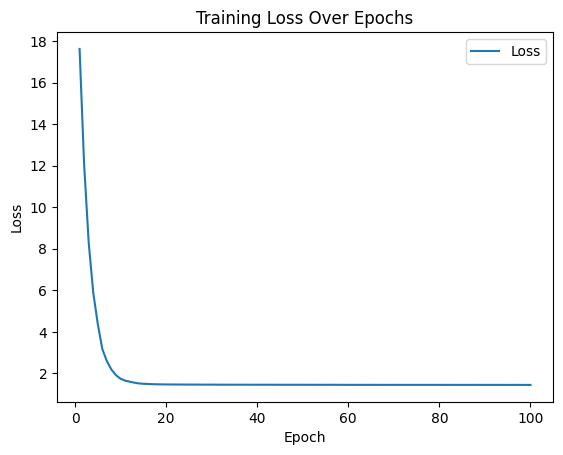

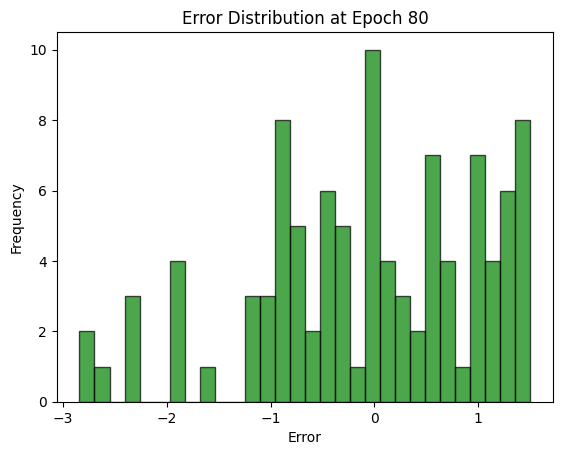

Parameters: reg_type=elastic_net, lr=0.005, reg_lambda=0.01, alpha=0.2
Final loss: 0.6343



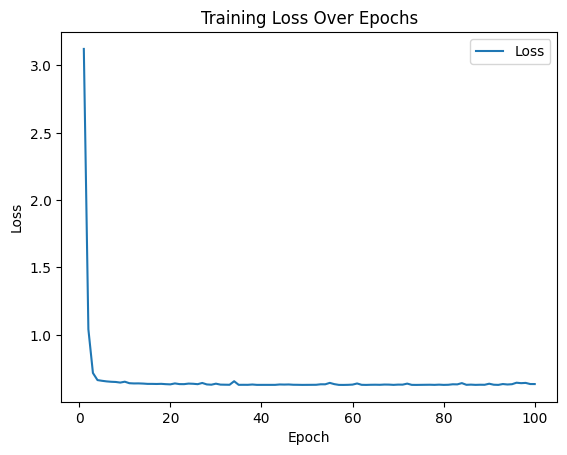

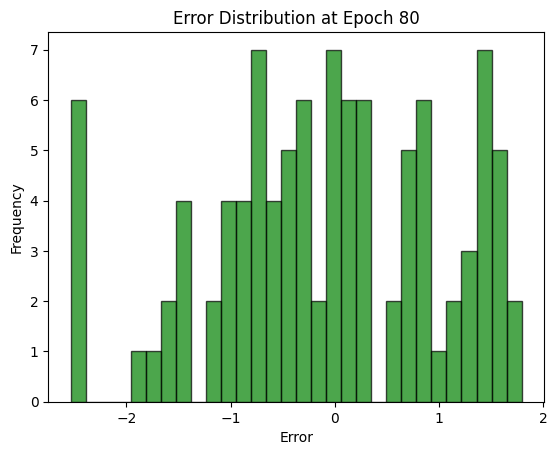

Parameters: reg_type=elastic_net, lr=0.005, reg_lambda=0.01, alpha=0.5
Final loss: 0.6132



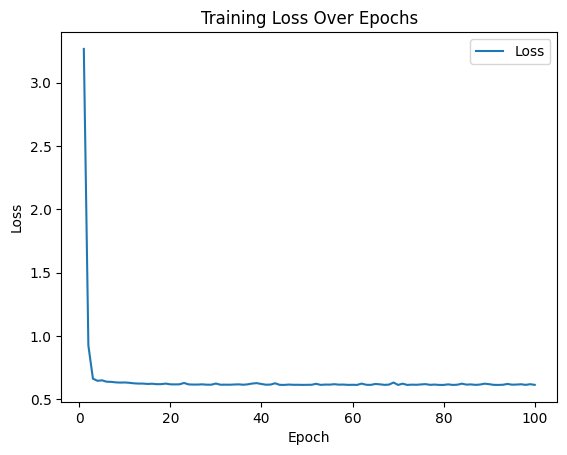

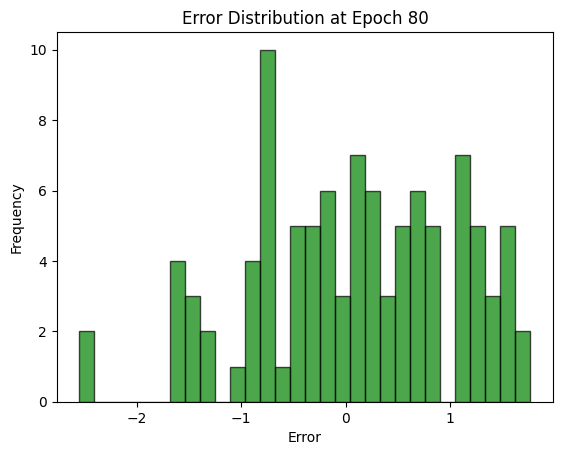

Parameters: reg_type=elastic_net, lr=0.005, reg_lambda=0.1, alpha=0.2
Final loss: 1.5742



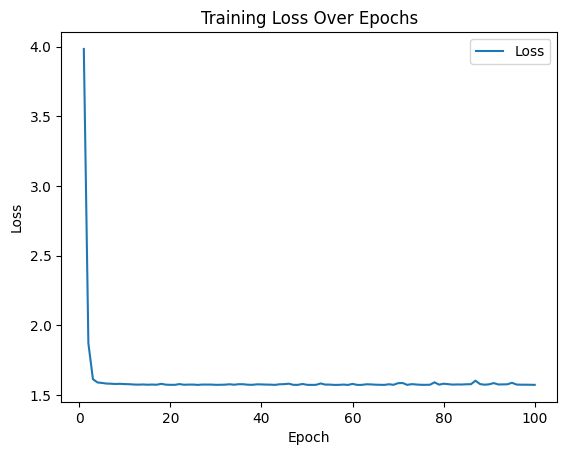

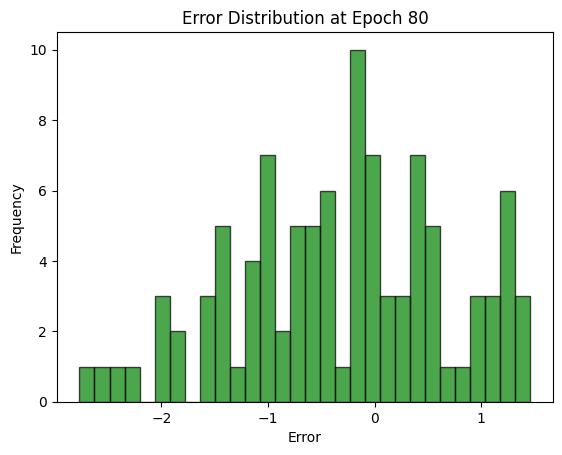

Parameters: reg_type=elastic_net, lr=0.005, reg_lambda=0.1, alpha=0.5
Final loss: 1.4426



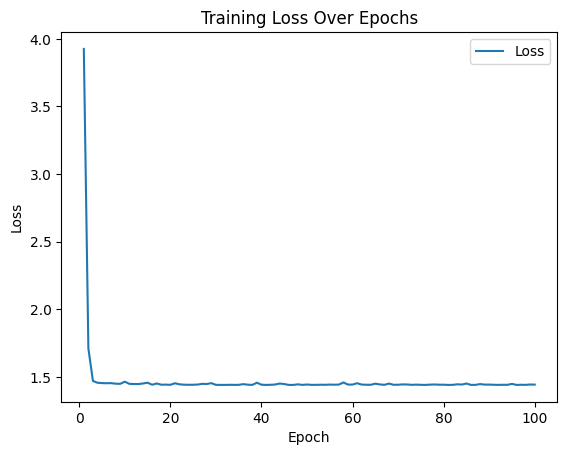

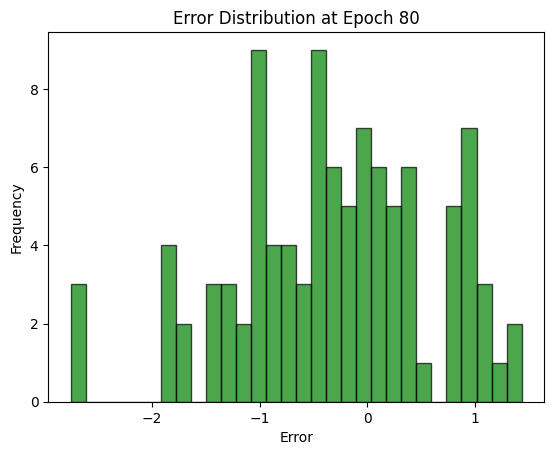

Top 5 best parameter combinations:
       reg_type     lr  reg_lambda  alpha  final_loss
3          None  0.005        0.10    0.5    0.518060
2          None  0.005        0.01    0.5    0.519843
0          None  0.001        0.01    0.5    0.523119
1          None  0.001        0.10    0.5    0.525056
6            l1  0.005        0.01    0.5    0.587246
4            l1  0.001        0.01    0.5    0.591120
17  elastic_net  0.005        0.01    0.5    0.613188
13  elastic_net  0.001        0.01    0.5    0.618362
16  elastic_net  0.005        0.01    0.2    0.634349
12  elastic_net  0.001        0.01    0.2    0.635621


In [49]:
# Гиперпараметры для перебора
reg_types = [None, 'l1', 'l2', 'elastic_net']
learning_rates = [0.001, 0.005]
reg_lambdas = [0.01, 0.1]
alphas = [0.2, 0.5]

# Создание случайных данных
np.random.seed(1408)
sample_size = 100
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)
X_b = np.c_[np.ones((sample_size, 1)), X]

# Список для сохранения результатов
results = []

# Перебор всех комбинаций параметров. product из itertools чтобы не создавать вложенный цикл
for reg_type, lr, reg_lambda, alpha in product(reg_types, learning_rates, reg_lambdas, alphas):
    # Elastic Net имеет смысл только при alpha != 0 или 1
    if reg_type != 'elastic_net' and alpha != 0.5:
        continue
    
    model = LinearRegressionSGD(lr=lr, epochs=100, reg_type=reg_type, reg_lambda=reg_lambda, alpha=alpha)
    model.fit(X_b, y)
    final_loss = model.loss_history[-1]
    
    # Сохранение результатов
    results.append({'reg_type': reg_type, 'lr': lr, 'reg_lambda': reg_lambda, 'alpha': alpha, 'final_loss': final_loss})
    
    # Вывод информации о параметрах
    print(f"Parameters: reg_type={reg_type}, lr={lr}, reg_lambda={reg_lambda}, alpha={alpha}")
    print(f"Final loss: {final_loss:.4f}\n")
    
    # Графики функции потерь и распределения
    model.plot_loss()
    model.plot_error_distribution(80)
    
    

# Преобразование результтов в датафрейм с 10-ю лучшими комбинациями параметров
results_df = pd.DataFrame(results)
top_10_results = results_df.nsmallest(10, 'final_loss')
print("Top 5 best parameter combinations:")
print(top_10_results)


Графики потерь показывают, что наименьшие значения функции потерь образовываются при отсутствии регуляризации. В данной ситуации присутствие методов регуляризации ухудшает точность предскзаний

## Часть 3. (15 баллов)

**Разбейте ваши данные** на две части в процентном соотношении 80/20, используя функцию `train_test_split` из `scikit-learn`. Первую часть используйте как **тренировочную выборку**, а а вторую - как **тестовую**.

Посмотрите, **как меняются значения лоссов** на тренировочной и тестовой выборке в процессе обучения. Какие модели больше переобучаются, а какие меньше?

*Если вы не понимаете как разбить вашу выборку, посмотрите другой файл домашки `hw3_data_analysis.ipynb`*

In [ ]:
# YOUR CODE HERE

**Отлично! Вы дошли до конца этой сложной части третьей домашки!**

Вы уже поняли, что мы ждём ваши впечатления. Особенно важно то, сколько времени у вас заняла эта часть. Нравятся ли вам задания с собственной реализацией методов и классов?

## Давайте следующий вопрос

Вставьте картинку, которая ассоциируется с вашим **любимым путешествием**. Пусть это будут горы или озёра, или любимая кафешка за пределами города, или фотка дома с котом, где вы провели какое-нибудь лето. Что угодно, где вам было комфортно и от чего у вас возникают тёплые воспоминания.

In [3]:
#We travel for romance, we travel for architecture, and we travel to be lost.
#Ray Bradbury